# Token Benchmark Example Analysis
The following is an example of the analysis that can be done on individual responses that are saved when running `token_benchmark_ray.py` with the flag `--results-dir` which enables the saving of all responses.

In [1]:
import pandas as pd

In [6]:
# path to the individual responses json file
df = pd.read_json('/home/ray/default/llmperf/result_outputs/550_150_individual_responses.json')


,error_code,error_msg,inter_token_latency_s,ttft_s,end_to_end_latency_s,request_output_throughput_token_per_s,number_total_tokens,number_output_tokens,number_input_tokens
0,NaN,,"[0.5549881670012831, 0.0009654169989510001, 0....",0.554988,1.610734,44.079272,706,71,635
1,NaN,,"[0.6019128750049271, 0.007011749999946, 0.0144...",0.601913,1.725729,44.039357,730,76,654


In [12]:
valid_df = df[(df["error_code"] != "")]

In [13]:
valid_df

,error_code,error_msg,inter_token_latency_s,ttft_s,end_to_end_latency_s,request_output_throughput_token_per_s,number_total_tokens,number_output_tokens,number_input_tokens
0,NaN,,"[0.5549881670012831, 0.0009654169989510001, 0....",0.554988,1.610734,44.079272,706,71,635
1,NaN,,"[0.6019128750049271, 0.007011749999946, 0.0144...",0.601913,1.725729,44.039357,730,76,654


Mean number of input tokens: 644.5. Mean number of output tokens: 73.5


<Axes: title={'center': 'Number of Input Tokens vs. TTFT'}, xlabel='number_input_tokens', ylabel='ttft_s'>

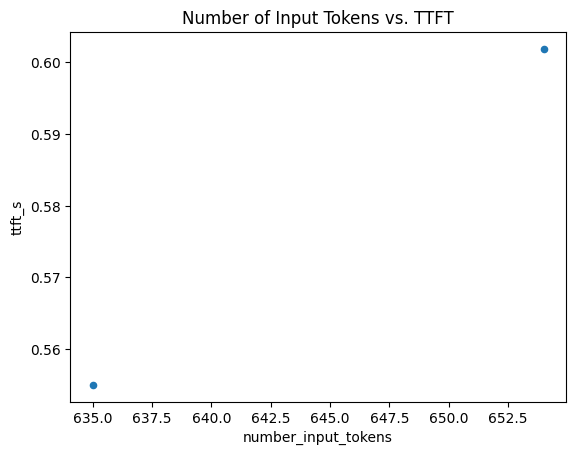

In [14]:
final_df = pd.DataFrame()
final_df["number_input_tokens"] = valid_df["number_input_tokens"]
final_df["number_output_tokens"] = valid_df["number_output_tokens"]
final_df["ttft_s"] = valid_df["ttft_s"]
final_df["end_to_end_latency_s"] = valid_df["end_to_end_latency_s"]
final_df["generation_throughput"] = valid_df["request_output_throughput_token_per_s"]

mean_tokens_in = final_df["number_input_tokens"].mean()
mean_tokens_out = valid_df["number_output_tokens"].mean()
print(f"Mean number of input tokens: {mean_tokens_in}. Mean number of output tokens: {mean_tokens_out}")
final_df.plot.scatter(x="number_input_tokens", y="ttft_s", title="Number of Input Tokens vs. TTFT")

<Axes: title={'center': 'Token Latencies'}, ylabel='Frequency'>

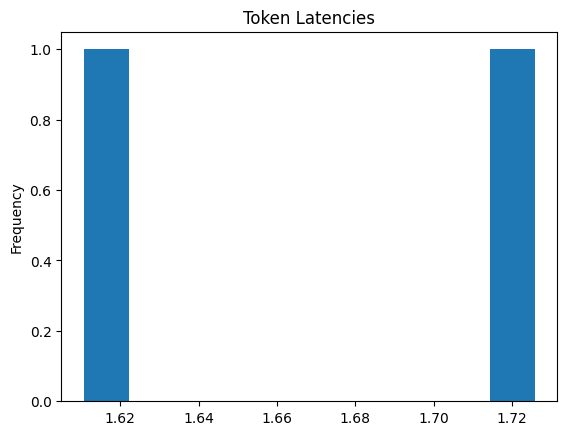

In [15]:
all_token_latencies = valid_df['end_to_end_latency_s'].apply(pd.Series).stack()
all_token_latencies = all_token_latencies.reset_index(drop=True)
all_token_latencies.plot.hist(title="Token Latencies")
